<img src = 'https://algotrading101.com/learn/wp-content/uploads/2020/06/yfinance.png'>

In [1]:
# pip install yfinance
import yfinance as yf
df = yf.download(
    'AAPL',
    start = '2019-01-01',
    end = '2021-06-12'
)
df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.282608,140014000
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.326302,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.508709,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.981869,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.901775,219111200


In [3]:
type(df['Adj Close'])

pandas.core.series.Series

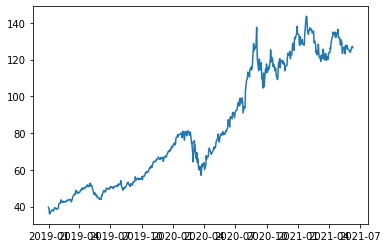

In [4]:
import matplotlib.pyplot as plt 
plt.plot(df['Open'])
plt.show()

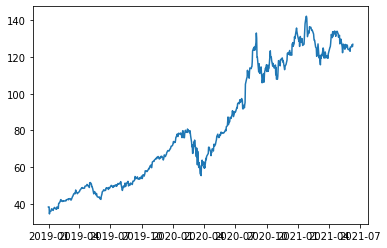

In [5]:
plt.plot(df['Adj Close'])
plt.show()

In [10]:
df['Adj Close']

Date
2018-12-31     38.282608
2019-01-02     38.326302
2019-01-03     34.508709
2019-01-04     35.981869
2019-01-07     35.901775
                 ...    
2021-06-07    125.528450
2021-06-08    126.365967
2021-06-09    126.754822
2021-06-10    125.737831
2021-06-11    126.974167
Name: Adj Close, Length: 617, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np 
x = df['Open'].values.reshape(-1,1)
y = df['Adj Close'].values.reshape(-1,1)
open_price_train, open_price_test, close_price_train, close_price_test = train_test_split(x,y, test_size = 0.1)
print(open_price_train.shape)
print(close_price_train.shape)
print(open_price_test.shape)
print(close_price_test.shape)


(555, 1)
(555, 1)
(62, 1)
(62, 1)


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(open_price_train, close_price_train)
print(f"Cofficient - {model.coef_}")
print(f"Intercept - {model.intercept_}")


Cofficient - [[1.00015964]]
Intercept - [-0.86827285]


In [17]:
prediction_close_price = model.predict(open_price_test)
prediction_close_price

array([[ 54.39804824],
       [132.67304677],
       [ 48.15205234],
       [117.48061937],
       [ 87.01075192],
       [123.20153374],
       [ 41.56600202],
       [ 47.09188175],
       [121.69129054],
       [ 38.20046315],
       [ 66.11741762],
       [ 44.9090344 ],
       [ 52.85030058],
       [ 66.2199349 ],
       [ 37.67537781],
       [ 51.61010476],
       [108.80923711],
       [ 51.86014467],
       [ 98.32005981],
       [132.6630354 ],
       [ 54.48556373],
       [ 55.70825874],
       [114.16008966],
       [ 43.86886746],
       [ 78.44188694],
       [ 48.5821213 ],
       [ 86.98074835],
       [ 35.13247238],
       [126.93212493],
       [114.43012941],
       [ 70.41310145],
       [ 66.08741405],
       [ 36.52769554],
       [117.10055382],
       [ 79.78710288],
       [ 48.24456589],
       [ 78.31936982],
       [ 95.40959159],
       [ 42.56616166],
       [ 42.08858452],
       [ 45.11406514],
       [133.23313372],
       [ 81.70740756],
       [111

In [18]:
import pandas as pd
data = {
    "Actual Price" : close_price_test.flatten(),
    "Prediction Price" : prediction_close_price.flatten()
}
df = pd.DataFrame(data)
df 

,Actual Price,Prediction Price
0,53.462967,54.398048
1,128.617111,132.673047
2,48.555527,48.152052
3,114.634315,117.480619
4,87.172852,87.010752
...,...,...
57,126.934280,124.381722
58,114.455719,113.870042
59,46.507607,46.616807
60,126.361015,127.932285


<AxesSubplot:>

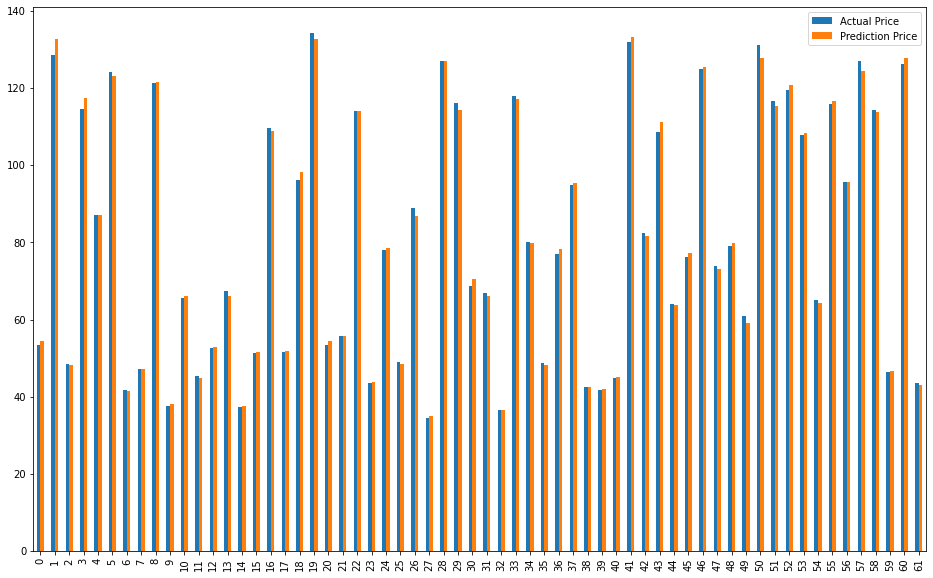

In [20]:
df.plot(kind = 'bar', figsize = (16,10))

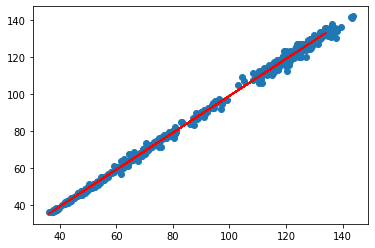

In [24]:
plt.scatter(open_price_train, close_price_train)
plt.plot(open_price_test, prediction_close_price, color='red')
plt.show()